In [8]:
from C_0X_defs import *
from misc_recorder import *

In [18]:
model_save_dir = os.path.join(model_save_, "C_0T-0611193546-5", "recon8-phi", "u")

In [19]:
train_losses = ListRecorder(os.path.join(model_save_dir, "train.loss"))
valid_losses = ListRecorder(os.path.join(model_save_dir, "valid.loss"))

In [20]:
train_losses.read()
valid_losses.read()

In [22]:
dim = 8

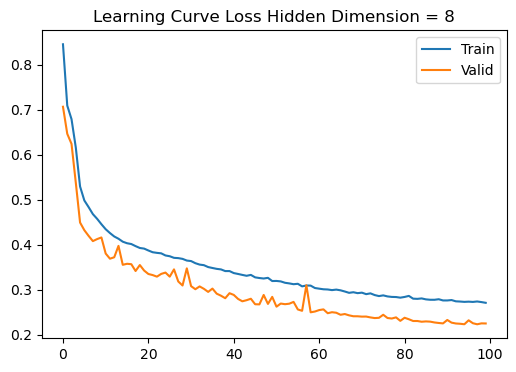

: 

In [26]:
start, end = 0, 100
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 4))
# Plot Loss on the left subplot
ax1.plot(train_losses.get()[start:end], label='Train')
ax1.plot(valid_losses.get()[start:end], label='Valid')
ax1.set_title(f"Learning Curve Loss Hidden Dimension = {dim}")

ax1.legend()
plt.savefig(os.path.join("z_out.png"), dpi=300)

a:\ProgramData\anaconda3\envs\wavln\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
a:\ProgramData\anaconda3\envs\wavln\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
a:\ProgramData\anaconda3\envs\wavln\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
a:\ProgramData\anaconda3\envs\wavln\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

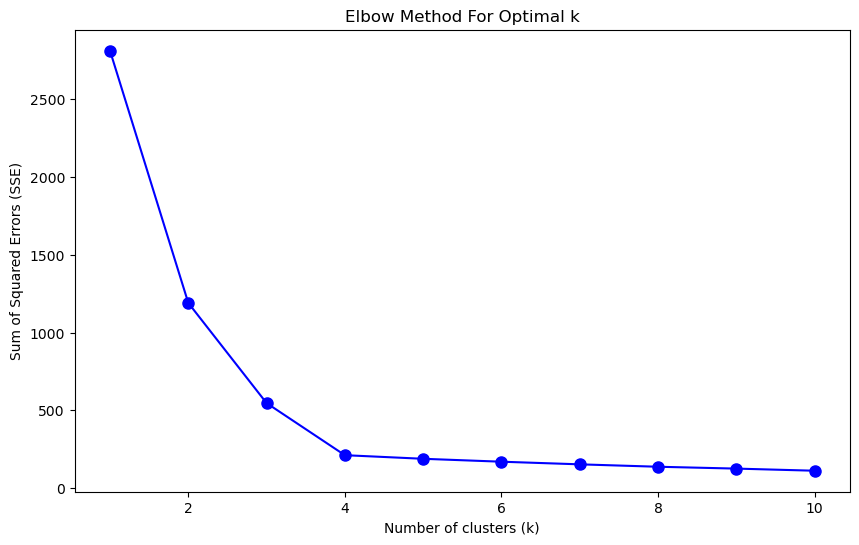

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic data
your_data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(your_data)
    sse.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()


In [1]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist

def hopkins_statistic(X, n_samples=100):
    """
    Calculate the Hopkins statistic for the dataset X.
    
    Parameters:
    X : array-like, shape (n_samples, n_features)
        The data matrix to be tested.
    n_samples : int, optional (default=100)
        Number of samples to generate for the test.
        
    Returns:
    hopkins_stat : float
        The Hopkins statistic, ranging from 0 to 1.
    """
    X = np.array(X)
    n, d = X.shape
    
    if n_samples > n:
        n_samples = n
        
    # Randomly select n_samples points from the dataset
    random_indices = np.random.choice(range(n), n_samples, replace=False)
    X_sample = X[random_indices]

    # Generate n_samples random points from the uniform distribution over the range of X
    X_min, X_max = np.min(X, axis=0), np.max(X, axis=0)
    X_uniform_random = np.random.uniform(X_min, X_max, (n_samples, d))

    # Compute nearest neighbors for both real and random points
    nbrs_real = NearestNeighbors(n_neighbors=2).fit(X)
    nbrs_random = NearestNeighbors(n_neighbors=1).fit(X)

    u_distances, _ = nbrs_random.kneighbors(X_uniform_random, n_neighbors=1)
    w_distances, _ = nbrs_real.kneighbors(X_sample, n_neighbors=2)

    # Hopkins statistic
    hopkins_stat = np.sum(u_distances) / (np.sum(u_distances) + np.sum(w_distances[:, 1]))

    return hopkins_stat


In [22]:
from sklearn.datasets import make_blobs

# Create a synthetic dataset with 3 clusters
X, _ = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=0)

# Calculate the Hopkins Statistic
hopkins_stat = hopkins_statistic(X, n_samples=100)
print(f"Hopkins Statistic: {hopkins_stat}")


Hopkins Statistic: 0.7876986239760084


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

/home/franklhtan/anaconda3/envs/wavln/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


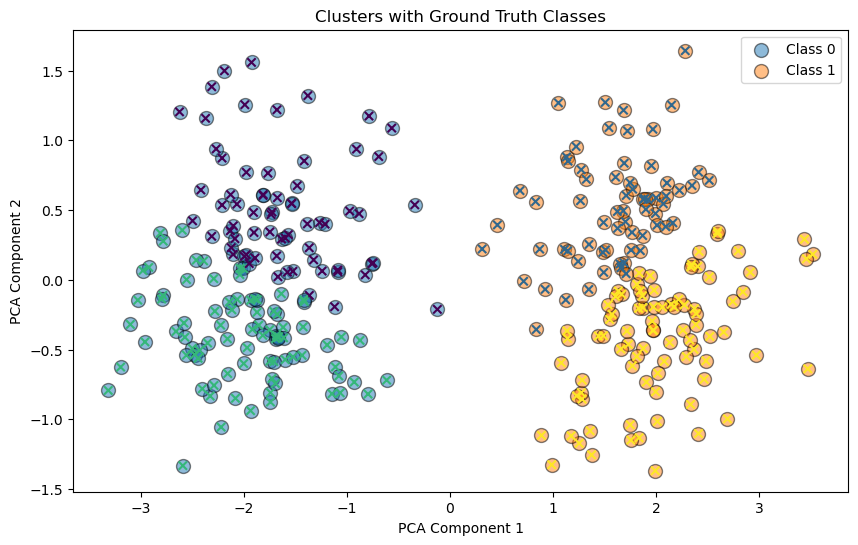

In [17]:
# Generate synthetic data with ground truth
your_data, ground_truth_labels = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=0)

# Fit KMeans to find the clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(your_data)
cluster_labels = kmeans.labels_

# Reduce dimensions if needed
reduced_data = PCA(n_components=2).fit_transform(your_data)

# Plot ground truth
plt.figure(figsize=(10, 6))
unique_labels = np.unique(ground_truth_labels)

for i, label in enumerate(unique_labels):
    plt.scatter(reduced_data[ground_truth_labels == label, 0], 
                reduced_data[ground_truth_labels == label, 1],
                label=f'Class {label}',
                marker='o', edgecolor='black', s=100, alpha=0.5)

# Overlay cluster labels
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', marker='x')

plt.title('Clusters with Ground Truth Classes')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
    

In [1]:
import numpy as np

arr = np.array([10, 20, 30, 40, 50, 60, 70])

# Assume start and end are determined earlier
start = 3
end = None  # Using None means slicing to the end of the array

subarray = arr[start:end]

print(subarray)


[40 50 60 70]
